In [1]:
# connect to your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change current path to a certain path(folder) in your drive.
# this folder may contain a image to be use in your homework.
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/weather_image')

In [3]:
# import module
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [16]:
# define image size and hyperparameters
img_width = 256
img_height = 256
batch_size = 16
epoch = 100

In [5]:
# data augmentation for training data
TRAINING_DIR = 'train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range = 30,
                                   zoom_range = 0.4,
                                   horizontal_flip = True,
                                   validation_split = 0.25)
print('train: ',end='')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    target_size = (img_height, img_width),
                                                    shuffle = True,
                                                    subset= 'training')

# validation data
print('validation: ',end='')
validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        target_size = (img_height, img_width),
                                                        shuffle = False,
                                                        subset= 'validation')

train: Found 787 images belonging to 4 classes.
validation: Found 261 images belonging to 4 classes.


In [6]:
# eraly stopping
callbacks = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, mode = 'auto')
# autosave best model
best_model_file = 'best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor = 'val_accuracy', verbose = 1, save_best_only = True)

In [17]:
# model
model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(4, activation = 'softmax')
])
model.summary()

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

In [18]:
history = model.fit_generator(train_generator,
                              epochs = epoch,
                              verbose = 1,
                              validation_data = validation_generator,
                              callbacks = [best_model]
                              )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
99/99 [==============================] - ETA: 0s - loss: 1.0082 - accuracy: 0.5311
Epoch 1: val_accuracy did not improve from 0.89655
99/99 [==============================] - 27s 262ms/step - loss: 1.0082 - accuracy: 0.5311 - val_loss: 0.8061 - val_accuracy: 0.5939
Epoch 2/100
99/99 [==============================] - ETA: 0s - loss: 0.6485 - accuracy: 0.7154
Epoch 2: val_accuracy did not improve from 0.89655
99/99 [==============================] - 26s 261ms/step - loss: 0.6485 - accuracy: 0.7154 - val_loss: 0.6695 - val_accuracy: 0.7471
Epoch 3/100
99/99 [==============================] - ETA: 0s - loss: 0.5825 - accuracy: 0.7662
Epoch 3: val_accuracy did not improve from 0.89655
99/99 [==============================] - 26s 259ms/step - loss: 0.5825 - accuracy: 0.7662 - val_loss: 0.6241 - val_accuracy: 0.7241
Epoch 4/100
99/99 [==============================] - ETA: 0s - loss: 0.4766 - accuracy: 0.7865
Epoch 4: val_accuracy did not improve from 0.89655
99/99 [=============

In [19]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

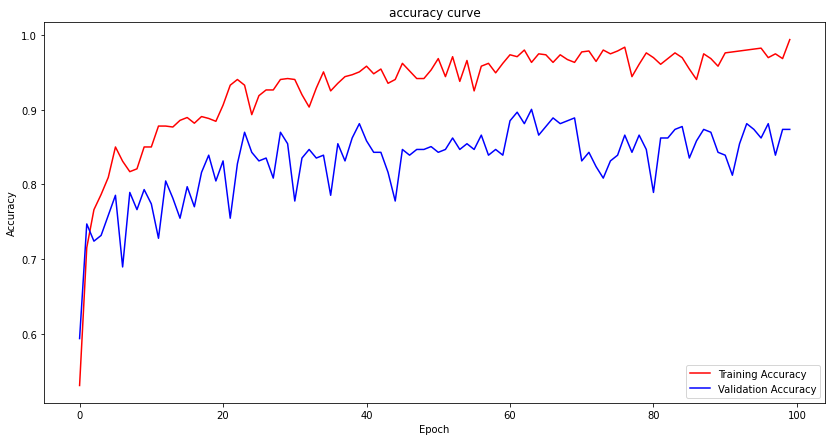

In [20]:
# plot accuracy
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right') # label location
plt.title('accuracy curve') 
plt.show()

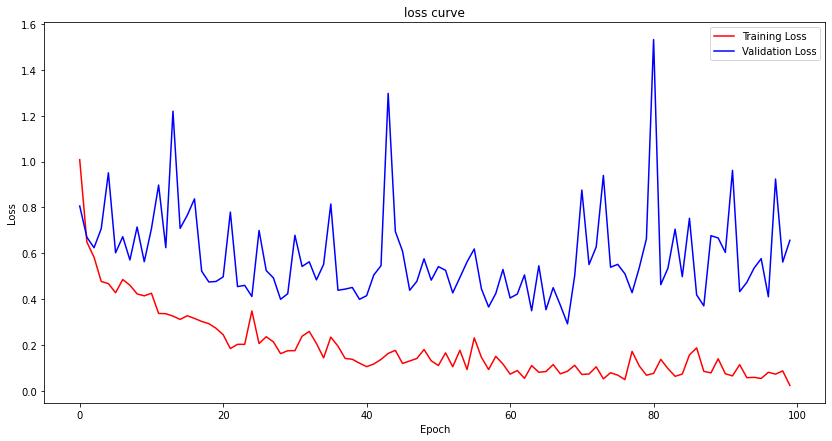

In [21]:
# plot loss
epochs = range(len(acc))
fig2 = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'r', label = "Training Loss")
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right') # label location
plt.title('loss curve')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


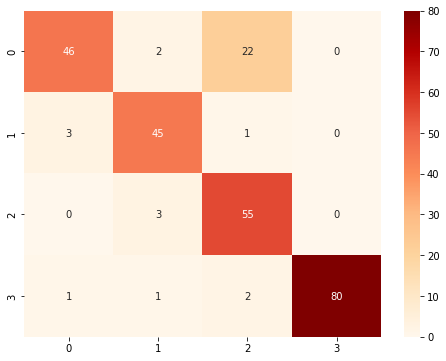

In [22]:
# confusion metrix of validation data
y = validation_generator.classes
y_hat = model.predict_generator(validation_generator)
pre = np.argmax(y_hat, axis=1)
res = confusion_matrix(y, pre)
fig = plt.figure(figsize=(8, 6))
sn.heatmap(res, annot=True, cmap="OrRd", fmt='g')

In [23]:
def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

TEST_DIR = 'test'

# sort image filename in testing data
testing_img = os.listdir(TEST_DIR+'/')
testing_img.sort(key = lambda x: int(x[:-4]))

test_images = [TEST_DIR + '/' + item for item in testing_img]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
# image to array for input type
np.save('test_preproc_CNN.npy', test_preprocessed_images)

In [24]:
# predict grading data
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
result = np.argmax(array, axis=1)

75/75 [==============================] - 0s 4ms/step


In [31]:
# caculate accuracy
y = [0]*20 + [1]*15 + [2]*20 + [3]*20
count = 0
for i in range(len(y)):
  if y[i] == result[i]:
    count += 1
  else:
    print(i+1,'.jpg')
print('accuracy:',count/len(y))

38 .jpg
54 .jpg
61 .jpg
accuracy: 0.96


In [32]:
# save predict result to df
df = pd.DataFrame()

df['image_id'] = testing_img
df['labels'] = result

# output csv file
df.to_csv("submission.csv", index = False)
df

,image_id,labels
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0
5,6.jpg,0
6,7.jpg,0
7,8.jpg,0
8,9.jpg,0
9,10.jpg,0
